In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies=pd.read_table(r"C:\Users\Admin\Desktop\movie lens project\movies.dat",
                     engine='python',sep='::',names=['MovieID','Title','GENRES'])
ratings=pd.read_table(r"C:\Users\Admin\Desktop\movie lens project\ratings.dat",
                      engine='python',sep='::',names=['User ID','Movie ID','Rating','Time Stamp'])
users=pd.read_table(r"C:\Users\Admin\Desktop\movie lens project\users.dat",
                    engine='python',sep='::',names=['User ID','Gender','Age','Occuption','Zip Code'])

In [3]:
movies=pd.DataFrame(movies)
ratings=pd.DataFrame(ratings)
users=pd.DataFrame(users)
print(type(movies))
print(type(ratings))
print(type(users))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
movies.head()

,MovieID,Title,GENRES
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,User ID,Movie ID,Rating,Time Stamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users.head()

,User ID,Gender,Age,Occuption,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
#Doing Inner join to make master Data
master_data=pd.concat([movies.MovieID,movies.Title,users['User ID'],users.Age,users.Gender,users.Occuption,ratings.Rating],
                      axis=1,
                      join='inner'
                     )

In [8]:
master_data.head()

,MovieID,Title,User ID,Age,Gender,Occuption,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,2,Jumanji (1995),2,56,M,16,3
2,3,Grumpier Old Men (1995),3,25,M,15,3
3,4,Waiting to Exhale (1995),4,45,M,7,4
4,5,Father of the Bride Part II (1995),5,25,M,20,5


In [9]:
# Assigning to df for simplification
df=master_data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 7 columns):
MovieID      3883 non-null int64
Title        3883 non-null object
User ID      3883 non-null int64
Age          3883 non-null int64
Gender       3883 non-null object
Occuption    3883 non-null int64
Rating       3883 non-null int64
dtypes: int64(5), object(2)
memory usage: 212.4+ KB


In [11]:
df.describe()

,MovieID,User ID,Age,Occuption,Rating
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000
mean,1986.049446,1942.000000,30.429307,8.207314,3.561937
std,1146.778349,1121.069876,13.062302,6.330827,1.095616
min,1.000000,1.000000,1.000000,0.000000,1.000000
25%,982.500000,971.500000,25.000000,3.000000,3.000000
50%,2010.000000,1942.000000,25.000000,7.000000,4.000000
75%,2980.500000,2912.500000,35.000000,14.000000,4.000000
max,3952.000000,3883.000000,56.000000,20.000000,5.000000


In [12]:
df.isna().sum()

MovieID      0
Title        0
User ID      0
Age          0
Gender       0
Occuption    0
Rating       0
dtype: int64

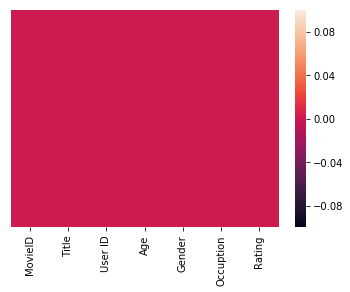

In [13]:
sns.heatmap(df.isna(),yticklabels=False)

Text(0.5, 1.0, 'Age Distribution')

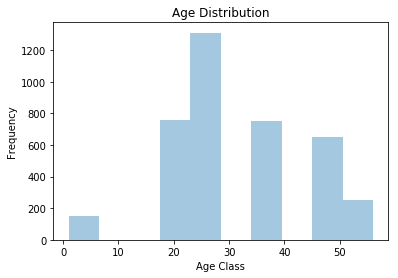

In [14]:
sns.distplot(df['Age'],bins=10,kde=False)
plt.xlabel("Age Class")
plt.ylabel("Frequency")
plt.title("Age Distribution")


# 1: User Age Distribution
Answer: Most of the users lying between age group 18 and 28

In [15]:
df.head()

,MovieID,Title,User ID,Age,Gender,Occuption,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,2,Jumanji (1995),2,56,M,16,3
2,3,Grumpier Old Men (1995),3,25,M,15,3
3,4,Waiting to Exhale (1995),4,45,M,7,4
4,5,Father of the Bride Part II (1995),5,25,M,20,5


In [16]:
master_data[master_data['Title']=='Toy Story (1995)']

,MovieID,Title,User ID,Age,Gender,Occuption,Rating
0,1,Toy Story (1995),1,1,F,10,5


# 2: User rating of the movie “Toy Story”

# 3: Top 25 movies by viewership rating


In [17]:
master_data.sort_values('Rating',ascending=False)[1:26]

,MovieID,Title,User ID,Age,Gender,Occuption,Rating
1396,1420,Message to Love: The Isle of Wight Festival (1...,1397,35,M,7,5
1478,1513,Romy and Michele's High School Reunion (1997),1479,50,F,2,5
1477,1511,A Chef in Love (1996),1478,1,M,10,5
1470,1502,Kissed (1996),1471,25,M,17,5
1469,1501,Keys to Tulsa (1997),1470,18,M,4,5
1460,1490,B*A*P*S (1997),1461,45,F,0,5
1439,1466,Donnie Brasco (1997),1440,35,M,12,5
1431,1458,Touch (1997),1432,35,M,1,5
1412,1437,"Cement Garden, The (1993)",1413,18,M,3,5
1387,1410,"Evening Star, The (1996)",1388,56,M,20,5


# 4: Find the ratings for all the movies reviewed by for a particular user of user id = 2696?

In [18]:
master_data[master_data['User ID']==2696]

,MovieID,Title,User ID,Age,Gender,Occuption,Rating
2695,2764,"Thomas Crown Affair, The (1968)",2696,25,M,7,3


In [19]:
unique=pd.DataFrame(movies['GENRES'].unique())
unique

,0
0,Animation|Children's|Comedy
1,Adventure|Children's|Fantasy
2,Comedy|Romance
3,Comedy|Drama
4,Comedy
5,Action|Crime|Thriller
6,Adventure|Children's
7,Action
8,Action|Adventure|Thriller
9,Comedy|Drama|Romance


In [20]:
genre=pd.get_dummies(movies['GENRES'],drop_first=True)
genre

,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,Action|Adventure|Comedy|Crime,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
master_data.corr()

,MovieID,User ID,Age,Occuption,Rating
MovieID,1.000000,0.999944,-0.004667,0.003366,-0.153298
User ID,0.999944,1.000000,-0.005309,0.003216,-0.153561
Age,-0.004667,-0.005309,1.000000,0.075108,-0.017635
Occuption,0.003366,0.003216,0.075108,1.000000,-0.001090
Rating,-0.153298,-0.153561,-0.017635,-0.001090,1.000000


In [22]:
master_data.head()

,MovieID,Title,User ID,Age,Gender,Occuption,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,2,Jumanji (1995),2,56,M,16,3
2,3,Grumpier Old Men (1995),3,25,M,15,3
3,4,Waiting to Exhale (1995),4,45,M,7,4
4,5,Father of the Bride Part II (1995),5,25,M,20,5


In [23]:
df=master_data

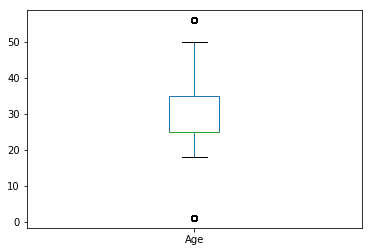

In [24]:
df['Age'].plot.box()

In [25]:
df=df[df['Age']!=1]

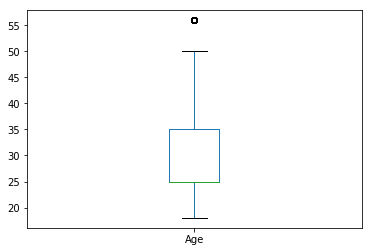

In [26]:
df['Age'].plot.box()

In [27]:
df=df[df['Age']!=56]

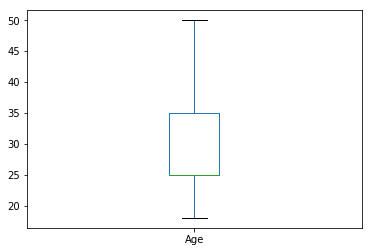

In [28]:
df['Age'].plot.box()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 2 to 3882
Data columns (total 7 columns):
MovieID      3476 non-null int64
Title        3476 non-null object
User ID      3476 non-null int64
Age          3476 non-null int64
Gender       3476 non-null object
Occuption    3476 non-null int64
Rating       3476 non-null int64
dtypes: int64(5), object(2)
memory usage: 217.2+ KB


In [30]:
df.head()

,MovieID,Title,User ID,Age,Gender,Occuption,Rating
2,3,Grumpier Old Men (1995),3,25,M,15,3
3,4,Waiting to Exhale (1995),4,45,M,7,4
4,5,Father of the Bride Part II (1995),5,25,M,20,5
5,6,Heat (1995),6,50,F,9,3
6,7,Sabrina (1995),7,35,M,1,5


In [31]:
sex=pd.get_dummies(df['Gender'],drop_first=True)

In [32]:
df_enc=pd.concat([df,sex],axis=1)

In [33]:
df_enc.head()

,MovieID,Title,User ID,Age,Gender,Occuption,Rating,M
2,3,Grumpier Old Men (1995),3,25,M,15,3,1
3,4,Waiting to Exhale (1995),4,45,M,7,4,1
4,5,Father of the Bride Part II (1995),5,25,M,20,5,1
5,6,Heat (1995),6,50,F,9,3,0
6,7,Sabrina (1995),7,35,M,1,5,1


In [34]:
df_final=df_enc.drop('Gender',axis=1)

In [35]:
df_final

,MovieID,Title,User ID,Age,Occuption,Rating,M
2,3,Grumpier Old Men (1995),3,25,15,3,1
3,4,Waiting to Exhale (1995),4,45,7,4,1
4,5,Father of the Bride Part II (1995),5,25,20,5,1
5,6,Heat (1995),6,50,9,3,0
6,7,Sabrina (1995),7,35,1,5,1
7,8,Tom and Huck (1995),8,25,12,5,1
8,9,Sudden Death (1995),9,25,17,4,1
9,10,GoldenEye (1995),10,35,1,4,0
10,11,"American President, The (1995)",11,25,1,5,0
11,12,Dracula: Dead and Loving It (1995),12,25,12,4,1


In [36]:
x1=df_final.drop('Title',axis=1)

In [37]:
x=x1.drop('Rating',axis=1)

In [38]:
x.head()

,MovieID,User ID,Age,Occuption,M
2,3,3,25,15,1
3,4,4,45,7,1
4,5,5,25,20,1
5,6,6,50,9,0
6,7,7,35,1,1


In [39]:
x=np.array(x)
x

array([[   3,    3,   25,   15,    1],
       [   4,    4,   45,    7,    1],
       [   5,    5,   25,   20,    1],
       ...,
       [3949, 3880,   25,    7,    1],
       [3950, 3881,   18,    2,    1],
       [3952, 3883,   50,   16,    1]], dtype=int64)

In [40]:
y=np.array(df_final.Rating)

In [41]:
y

array([3, 4, 5, ..., 2, 3, 4], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split as tts

In [43]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.20,random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression as LR

In [45]:
model=LR()

In [46]:
x_train[:10,:]

array([[2579, 2511,   25,    7,    1],
       [ 591,  588,   25,   11,    0],
       [2559, 2491,   35,    7,    1],
       [2291, 2223,   25,    2,    1],
       [3471, 3403,   35,    5,    1],
       [1256, 1237,   18,    4,    1],
       [2589, 2521,   35,   17,    1],
       [2645, 2577,   25,    7,    1],
       [3915, 3846,   35,    0,    1],
       [ 783,  774,   18,    4,    1]], dtype=int64)

In [47]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
y_pred=model.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error as mse

In [50]:
mse(y_test,y_pred)

1.1918151942033821

# MSE=1.19 Which is Good Value to predict Model

# Linechart of Actual VS Predicted Value

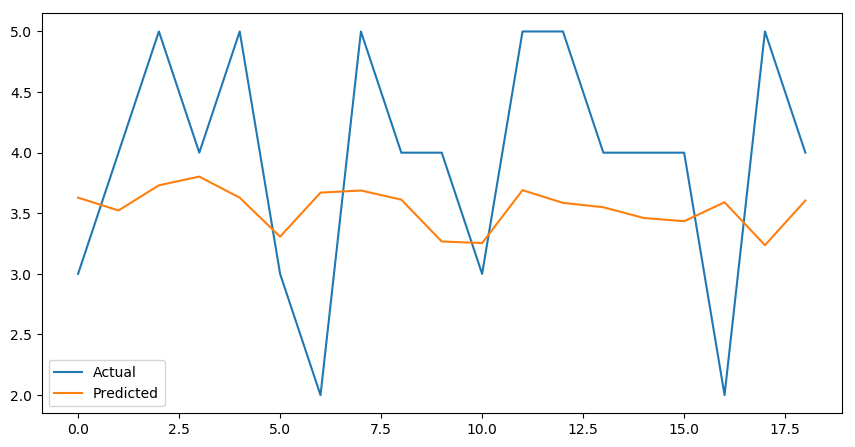

In [51]:
fig=plt.figure(figsize=(8,4),dpi=100)
axes=fig.add_axes([0,0,1,1])
axes.plot(y_test[1:20],label='Actual')
axes.plot(y_pred[1:20],label='Predicted')
axes.legend()